<a href="https://colab.research.google.com/github/narsym/deep-learning-with-pytorch/blob/master/Image_Classification_using_pytorch_on_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import torch
import torchvision 
import tarfile
from torchvision.datasets.utils import download_url

In [2]:
dataset_url = 'http://files.fast.ai/data/cifar10.tgz'
download_url(dataset_url, '.')

In [3]:
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
  tar.extractall(path = './data')

In [4]:
data_dir = './data/cifar10'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + '/train')
print(classes)

['test', 'labels.txt', 'train']
['horse', 'bird', 'deer', 'frog', 'automobile', 'dog', 'airplane', 'cat', 'ship', 'truck']


In [6]:
airplane_files = os.listdir(data_dir + '/train/airplane')
print('No of training examples for airplanes:', len(airplane_files))

No of training examples for airplanes: 5000


In [7]:
airplane_files = os.listdir(data_dir + '/test/airplane')
print('No of training examples for airplanes:', len(airplane_files))

No of training examples for airplanes: 1000


In [8]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [10]:
dataset = ImageFolder(data_dir + '/train', transform = ToTensor())

In [11]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.8588, 0.8588, 0.8627,  ..., 0.8510, 0.8471, 0.8392],
         [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
         [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
         ...,
         [0.8980, 0.9020, 0.9098,  ..., 0.8980, 0.8902, 0.8863],
         [0.8471, 0.8549, 0.8706,  ..., 0.8980, 0.8902, 0.8824],
         [0.7608, 0.7490, 0.7725,  ..., 0.8980, 0.8902, 0.8824]],

        [[0.9333, 0.9333, 0.9373,  ..., 0.9176, 0.9137, 0.9059],
         [0.9412, 0.9412, 0.9490,  ..., 0.9294, 0.9216, 0.9137],
         [0.9412, 0.9412, 0.9490,  ..., 0.9255, 0.9216, 0.9137],
         ...,
         [0.9608, 0.9569, 0.9569,  ..., 0.9412, 0.9412, 0.9412],
         [0.9020, 0.9098, 0.9255,  ..., 0.9412, 0.9412, 0.9373],
         [0.8157, 0.8039, 0.8275,  ..., 0.9412, 0.9412, 0.9373]],

        [[0.9608, 0.9608, 0.9647,  ..., 0.9490, 0.9412, 0.9412],
         [0.9686, 0.9686, 0.9765,  ..., 0.9608, 0.9529, 0.9490],
         [0.9686, 0.9686, 0.9765,  ..., 0.9569, 0.9529, 0.

In [12]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [13]:
import matplotlib.pyplot as plt

def show_example(img, label):
  print('Label: ', dataset.classes[label], f'{label}')
  plt.imshow(img.permute(1, 2, 0))

Label:  airplane 0


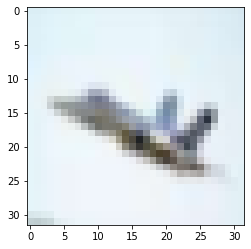

In [15]:
show_example(*dataset[0]) # * is the spread operator

Label:  airplane 0


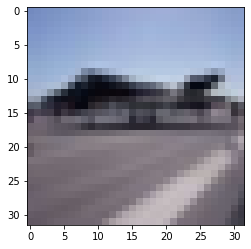

In [16]:
show_example(*dataset[1])

In [17]:
import numpy as np

def split_indices(n, val_pct = 0.1, seed = 99):

  n_val = int(val_pct * n)
  np.random.seed(seed)
  idxs = np.random.permutation(n)
  return idxs[n_val:], idxs[:n_val]

In [18]:
val_pct = 0.2
rand_seed = 43

train_indices, val_indices = split_indices(len(dataset), val_pct, rand_seed)
print(len(train_indices), len(val_indices))
print('Sample validation indices: ', val_indices[:10])

40000 10000
Sample validation indices:  [ 7396 29820  1987 20095 32435 44197 45912  5519 21418 34368]


In [19]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

batch_size = 100

In [45]:
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset, batch_size, sampler = train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_dl = DataLoader(dataset, batch_size = 100, sampler = val_sampler)

In [21]:
from torchvision.utils import make_grid

def show_batch(dl):
  for images, labels in dl:
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, 10).permute(1, 2, 0))
    break

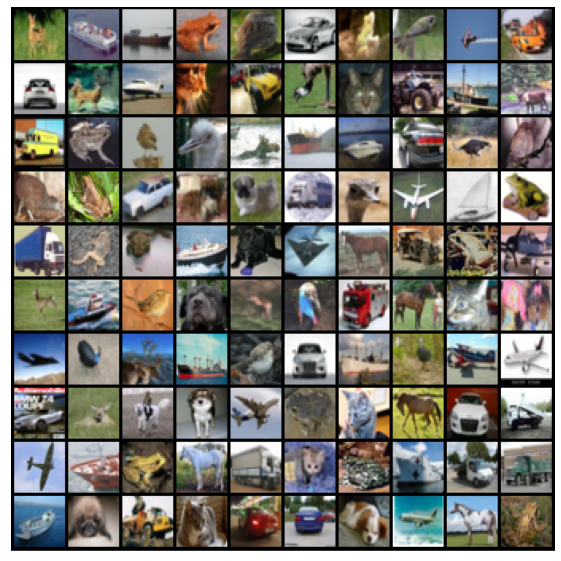

In [22]:
show_batch(train_dl)

In [23]:
import torch.nn as nn
import torch.nn.functional as F

In [25]:
simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size = 3, stride = 1, padding = 1),
    nn.MaxPool2d(2,2)
)

In [27]:
for images, label in train_dl:
  print('images.shape:', images.shape)
  out = simple_model(images)
  print('out shape: ', out.shape)
  break

images.shape: torch.Size([100, 3, 32, 32])
out shape:  torch.Size([100, 8, 16, 16])


In [30]:
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(), 
    nn.MaxPool2d(2,2),

    nn.Conv2d(16, 16, kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(16, 16, kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(16, 16, kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),

    nn.Conv2d(16, 16, kernel_size = 3, stride = 1, padding = 1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),

    nn.Flatten(),
    nn.Linear(16, 10)
)

In [31]:
model[0].weight.shape

torch.Size([16, 3, 3, 3])

In [32]:
for images, labels in train_dl:
  print('images.shape: ', images.shape)
  out = model(images)
  print('out.shape: ', out.shape)
  print('out[0]: ', out[0])
  break

images.shape:  torch.Size([100, 3, 32, 32])
out.shape:  torch.Size([100, 10])
out[0]:  tensor([-0.2644, -0.1179, -0.1617,  0.1169,  0.0420,  0.0819, -0.0738,  0.1245,
         0.0075, -0.2325], grad_fn=<SelectBackward>)


In [33]:
probs = F.softmax(out[0], dim = 0)
torch.sum(probs), probs

(tensor(1., grad_fn=<SumBackward0>),
 tensor([0.0798, 0.0924, 0.0884, 0.1168, 0.1084, 0.1128, 0.0965, 0.1177, 0.1047,
         0.0824], grad_fn=<SoftmaxBackward>))

In [34]:
torch.max(probs)

tensor(0.1177, grad_fn=<MaxBackward1>)

In [36]:
dataset.classes[9]

'truck'

In [37]:
dataset.classes[labels[0]]

'cat'

Label:  cat 3


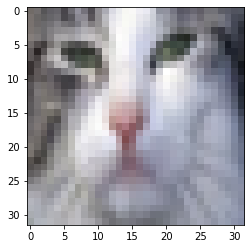

In [38]:
show_example(images[0], labels[0])

In [43]:
def get_default_device():
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

class DeviceDataLoader():

  def __init__(self, dl, device):
    self.dl = dl
    self.device = device

  def __iter__(self):
    for b in self.dl:
      yield to_device(b, self.device)

  def __len__(self):
    return len(self.dl)

def to_device(data, device):
  if isinstance(data, (list, tuple)):
    return [to_device(x, device) for x in data]
  return data.to(device, non_blocking = True)

In [44]:
device = get_default_device()
device

device(type='cuda')

In [46]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(val_dl, device)
to_device(model, device)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten()
  (16): Linear(in_features=16, out_features=10, bias=True)
)

In [47]:
def loss_batch(model, loss_func, xb, yb, opt = None, metric = None):
  
  preds = model(xb)
  loss = loss_func(preds, yb)

  if opt is not None:

    loss.backward()
    opt.step()
    opt.zero_grad()

  metric_result = None
  if metric is not None:
    metric_result = metric(preds, yb)

  return loss.item(), len(xb), metric_result

In [52]:
def evaluate(model, loss_fn, valid_dl, metric = None):

  with torch.no_grad():
    result = [loss_batch(model, loss_fn, xb, yb, metric = metric) for xb, yb in valid_dl]
    losses, nums, metrics = zip(*result)

    total = np.sum(nums)
    avg_loss = np.sum(np.multiply(losses, nums)) / total
    avg_metric = None

    if metric is not None:
      avg_metric = np.sum(np.multiply(metrics, nums)) / total

  return avg_loss, total, avg_metric

In [53]:
def fit(epochs, model, loss_fn, train_dl, valid_dl, opt_fn = None, lr = None, metric = None):

  train_losses, val_losses, val_metrics = [], [], []

  if opt_fn is None: 
    opt_fn = torch.optim.SGD
  opt = opt_fn(model.parameters(), lr = lr)

  for epoch in range(epochs):
    model.train()
    for xb, yb, in train_dl:
      train_loss, _, _ = loss_batch(model, loss_fn, xb, yb, opt)

    model.eval()
    result = evaluate(model, loss_fn, valid_dl, metric)
    val_loss, total, val_metric = result

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_metrics.append(val_metric)

    if metric is None:
      print(f'Epoch [{epoch + 1}/{epochs}, train_loss: {train_loss}, val_loss: {val_loss}')
    else:
      print(f'Epoch [{epoch + 1}/{epochs}, train_loss: {train_loss}, val_loss: {val_loss}, {metric.__name__} {val_metric}')
  
  return train_losses, val_losses, val_metrics 

In [54]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim = 1)
  return torch.sum(preds == labels).item() / len(preds)

In [55]:
val_loss, _, val_acc = evaluate(model, F.cross_entropy, valid_dl, metric = accuracy)
print(f'Loss: {val_loss}, acc: {val_acc}')

Loss: 2.31055634021759, acc: 0.1061


In [56]:
num_epochs = 10
opt_fn = torch.optim.Adam
lr = 0.005

In [ ]:
history = fit(num_epochs, model, F.cross_entropy, train_dl, valid_dl, opt_fn, lr, accuracy)


In [58]:
train_losses, val_losses, val_metrics = history

In [59]:
def plot_metric(metric_values):

  plt.plot(metric_values, '-x')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.title('Accuracy vs. No. of epocs')

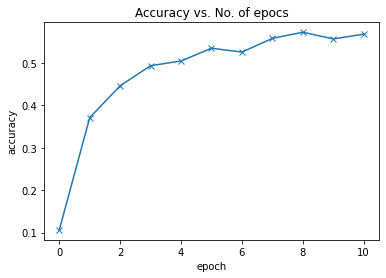

In [61]:
plot_metric([val_acc] + val_metrics)

In [63]:
def plot_losses(train_losses, val_losses):
  plt.plot(train_losses, '-x')
  plt.plot(val_losses, '-o')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['training', 'validation'])
  plt.title('Loss vs. No. of epocs')

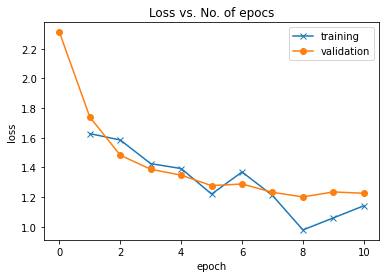

In [64]:
plot_losses([None] + train_losses, [val_loss] + val_losses)